In [2]:
import cv2
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from hashlib import md5
import scipy
from scipy.misc import imresize, imshow
from imageio import imread
%matplotlib inline

In [13]:
DIR = "images/image/"
os.chdir(DIR)
image_files = os.listdir()
display(os.getcwd())
display(len(image_files))
display(image_files[0])
display(imread(image_files[0]).shape)

'/home/aditya8404/duplicate-images/images/image'

148668

'BRAEAF5GFSZT3PEJ.jpeg'

(400, 371, 3)

In [28]:
def filter_images(images):
    image_list = []
    for image in images:
        try:
            assert imread(image).shape[2] == 3
            image_list.append(image)
        except :
            pass
    return image_list

In [29]:
def img_gray(image):
    image = imread(image)
    return np.average(image, weights=[0.299, 0.587, 0.114], axis=2)

In [30]:
def resize(image, height=200, width=128):
    row_res = cv2.resize(image,(height, width), interpolation = cv2.INTER_AREA).flatten()
    col_res = cv2.resize(image,(height, width), interpolation = cv2.INTER_AREA).flatten('F')
    return row_res, col_res

In [31]:
def intensity_diff(row_res, col_res):
    difference_row = np.diff(row_res)
    difference_col = np.diff(col_res)
    difference_row = difference_row > 0
    difference_col = difference_col > 0
    return np.vstack((difference_row, difference_col)).flatten()

In [32]:
def file_hash(array):
    return md5(array).hexdigest()

In [33]:
def difference_score(image, height = 200, width = 128):
    gray = img_gray(image)
    row_res, col_res = resize(gray, height, width)
    difference = intensity_diff(row_res, col_res)
    
    return difference

In [34]:
def difference_score_dict_hash(image_list):
    ds_dict = {}
    duplicates = []
    hash_ds = []
    for image in image_list:
        ds = difference_score(image)
        hash_ds.append(ds)
        filehash = md5(ds).hexdigest()
        if filehash not in ds_dict:
            ds_dict[filehash] = image
        else:
            duplicates.append((image, ds_dict[filehash]) )
    
    return  duplicates, ds_dict, hash_ds

In [35]:
image_files = filter_images(image_files)
duplicates, ds_dict, hash_ds = difference_score_dict_hash(image_files)

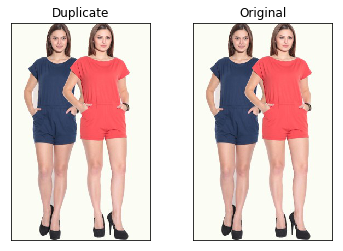

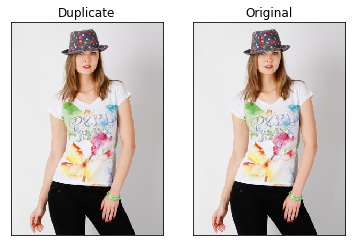

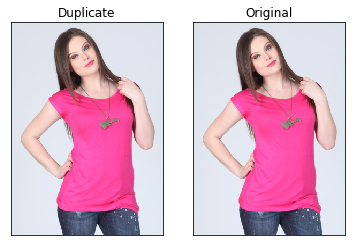

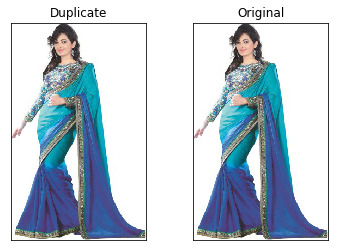

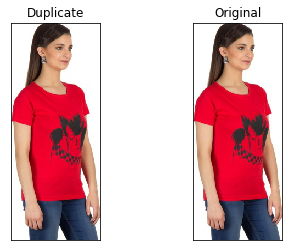

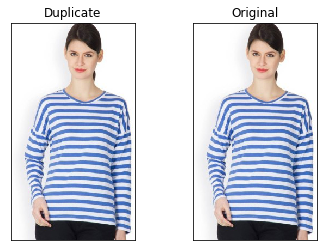

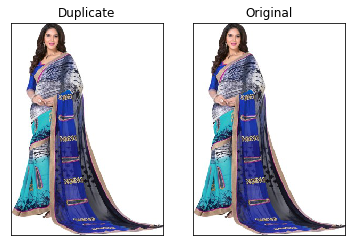

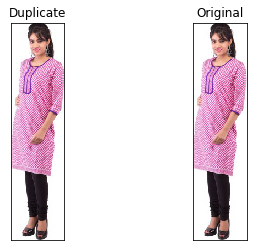

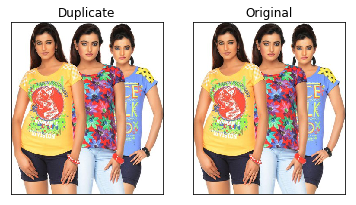

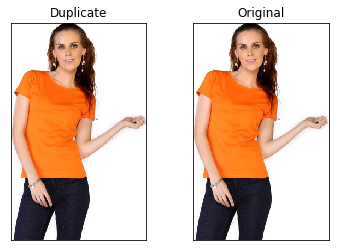

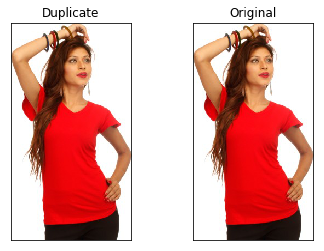

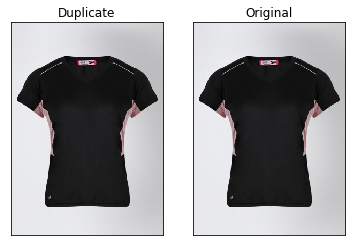

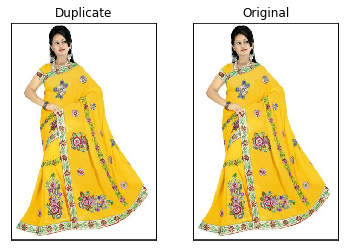

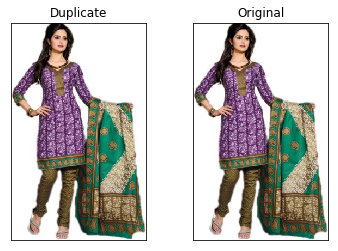

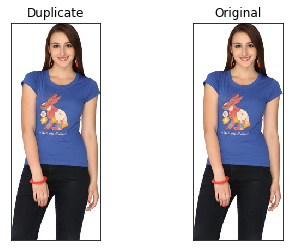

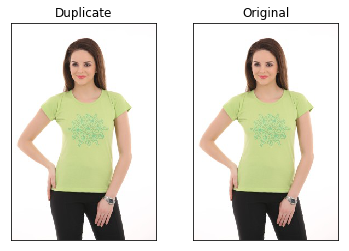

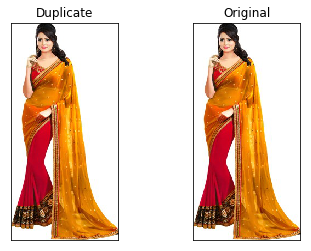

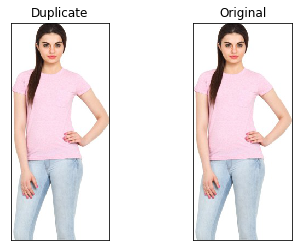

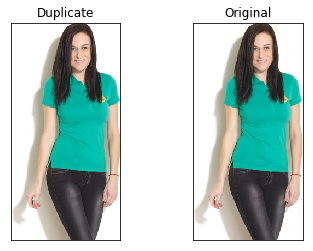

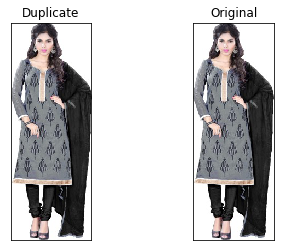

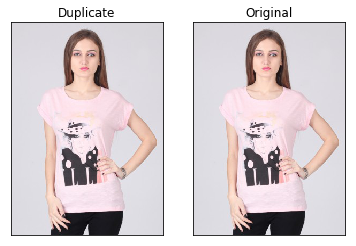

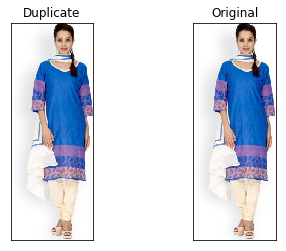

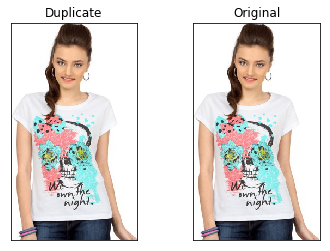

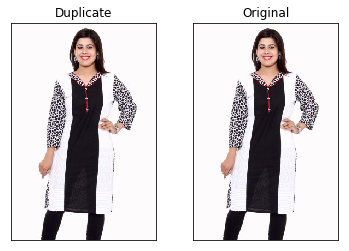

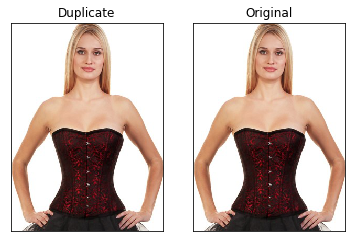

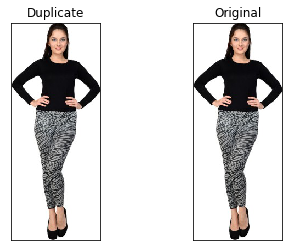

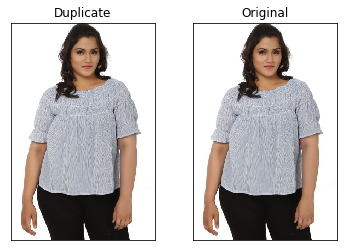

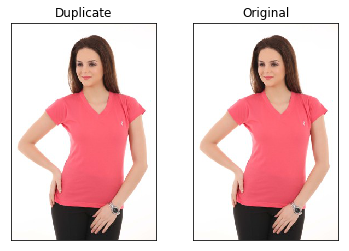

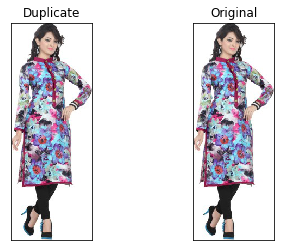

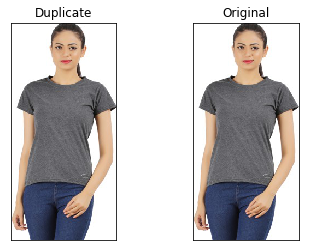

In [36]:
for file_names in duplicates[:30]:
    try:
    
        plt.subplot(121),plt.imshow(imread(file_names[0]))
        plt.title('Duplicate'), plt.xticks([]), plt.yticks([])

        plt.subplot(122),plt.imshow(imread(file_names[1]))
        plt.title('Original'), plt.xticks([]), plt.yticks([])
        plt.show()
    
    except OSError as e:
        continue

In [37]:
def hamming_distance(image, image2):
    score =scipy.spatial.distance.hamming(image, image2)
    return score

In [38]:
def difference_score_dict(image_list):
    ds_dict = {}
    duplicates = []
    for image in image_list:
        ds = difference_score(image)
        
        if image not in ds_dict:
            ds_dict[image] = ds
        else:
            duplicates.append((image, ds_dict[image]) )
    
    return  duplicates, ds_dict

In [39]:
image_files = filter_images(image_files)
duplicates, ds_dict =difference_score_dict(image_files)

In [41]:
len(ds_dict.keys())

148662

In [ ]:
import itertools
for k1,k2 in itertools.combinations(ds_dict, 2):
    if hamming_distance(ds_dict[k1], ds_dict[k2])< .10:
        duplicates.append((k1,k2))